In [1]:
isColab = True
try:
  from oauth2client.client import GoogleCredentials
  from pydrive.drive import GoogleDrive
  from google.colab import auth, drive
  from pydrive.auth import GoogleAuth
except:
  isColab = False
from random import randint, shuffle, random
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import zipfile
import shutil
import glob
import cv2
import os

In [2]:
# drive.mount('/content/drive', force_remount=True)
ROOT_DIR = '/content/drive/MyDrive/University/UniPI/Deep Learning/Project' if isColab else os.path.curdir

In [3]:
glosses_train = []
psnrs_train = []
ssims_train = []
with open(os.path.join(ROOT_DIR, "losses_train.chk"), "r") as trainfile:
  while line := trainfile.readline():
    gloss, psnr, ssim = [float(m) for m in line.split(";")]
    glosses_train.append(gloss)
    psnrs_train.append(psnr)
    ssims_train.append(ssim)

glosses_test = []
psnrs_test = []
ssims_test = []
with open(os.path.join(ROOT_DIR, "losses_test.chk"), "r") as testfile:
  while line := testfile.readline():
    gloss, psnr, ssim = [float(m) for m in line.split(";")]
    glosses_test.append(gloss)
    psnrs_test.append(psnr)
    ssims_test.append(ssim)

psnrs_eval = []
ssims_eval = []
with open(os.path.join(ROOT_DIR, "eval.chk"), "r") as evalfile:
  while line := evalfile.readline():
    psnr, ssim = [float(m) for m in line.split(";")]
    psnrs_eval.append(psnr)
    ssims_eval.append(ssim)

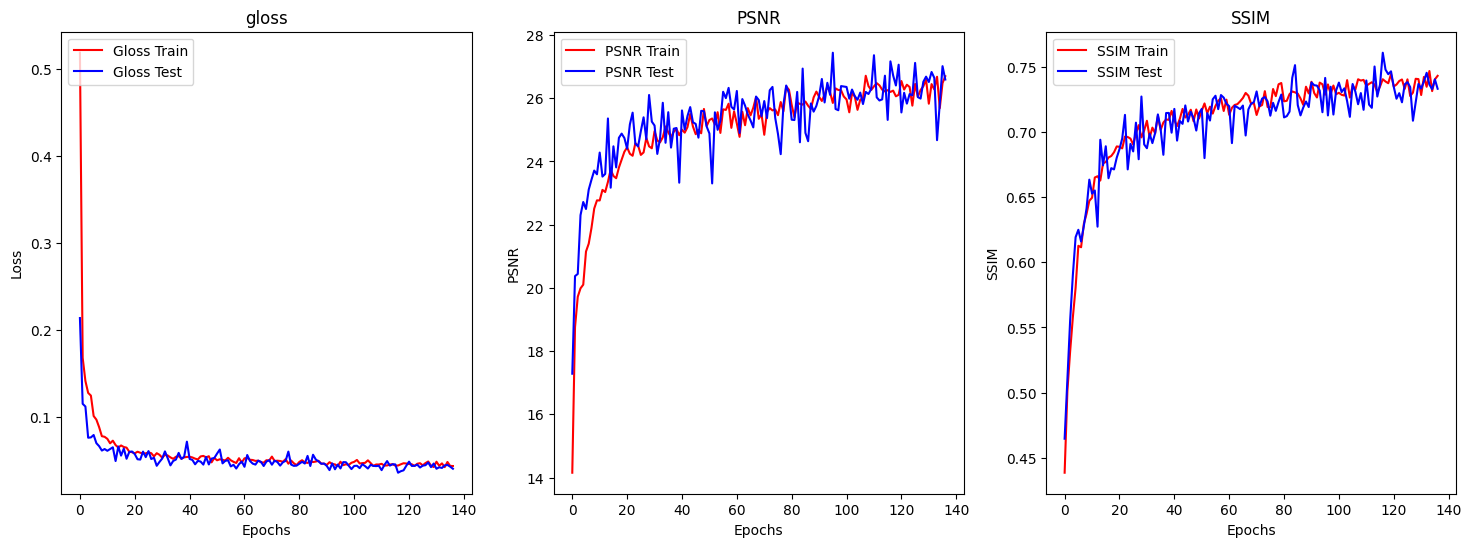

In [4]:
_, plts = plt.subplots(1,3,figsize=(18,6))

plts[0].set_title("gloss")
plts[0].plot(list(range(len(glosses_train))), glosses_train, '-r', label='Gloss Train')
plts[0].plot(list(range(len(glosses_train))), glosses_test, '-b', label="Gloss Test")
plts[0].set_xlabel('Epochs')
plts[0].set_ylabel('Loss')
plts[0].legend(loc="upper left")

plts[1].set_title("PSNR")
plts[1].plot(list(range(len(psnrs_train))), psnrs_train, '-r', label='PSNR Train')
plts[1].plot(list(range(len(psnrs_train))), psnrs_test, '-b', label='PSNR Test')
plts[1].set_xlabel('Epochs')
plts[1].set_ylabel('PSNR')
plts[1].legend(loc="upper left")

plts[2].set_title("SSIM")
plts[2].plot(list(range(len(ssims_train))), ssims_train, '-r', label='SSIM Train')
plts[2].plot(list(range(len(ssims_train))), ssims_test, '-b', label='SSIM Test')
plts[2].set_xlabel('Epochs')
plts[2].set_ylabel('SSIM')
plts[2].legend(loc="upper left")

plt.show()

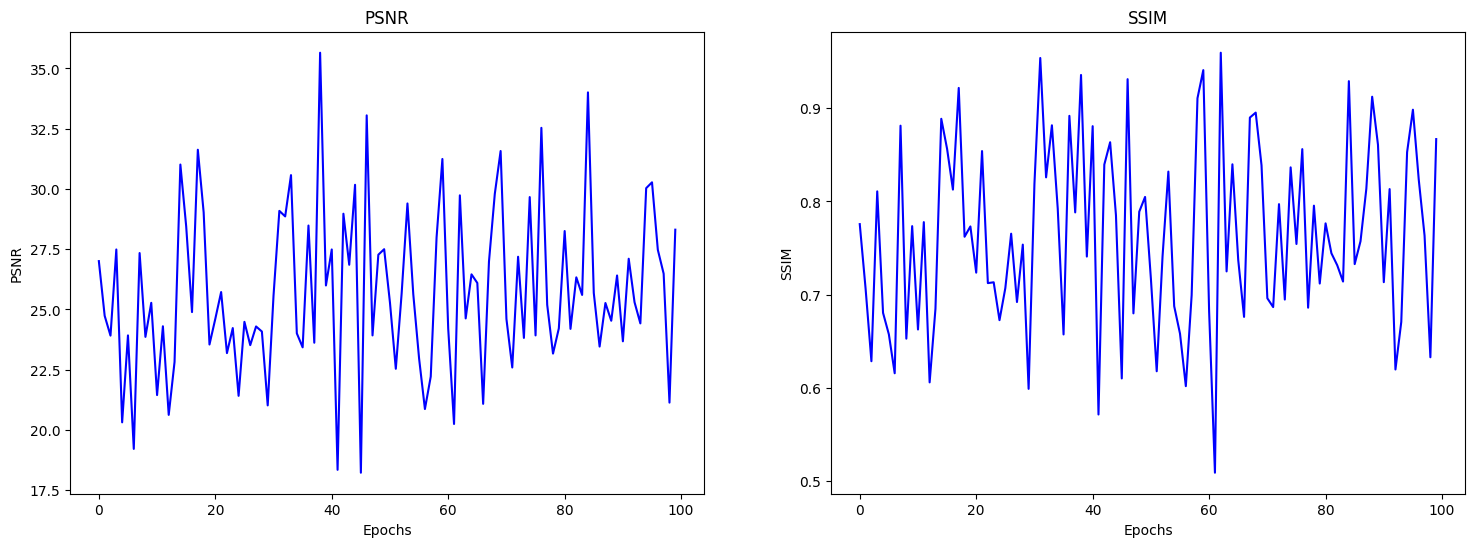

In [5]:
_, plts = plt.subplots(1,2,figsize=(18,6))

plts[0].set_title("PSNR")
plts[0].plot(list(range(len(psnrs_eval))), psnrs_eval, '-b')
plts[0].set_xlabel('Epochs')
plts[0].set_ylabel('PSNR')

plts[1].set_title("SSIM")
plts[1].plot(list(range(len(ssims_eval))), ssims_eval, '-b')
plts[1].set_xlabel('Epochs')
plts[1].set_ylabel('SSIM')

plt.show()
